# LOGISTIC REGRESSION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------------------------------------


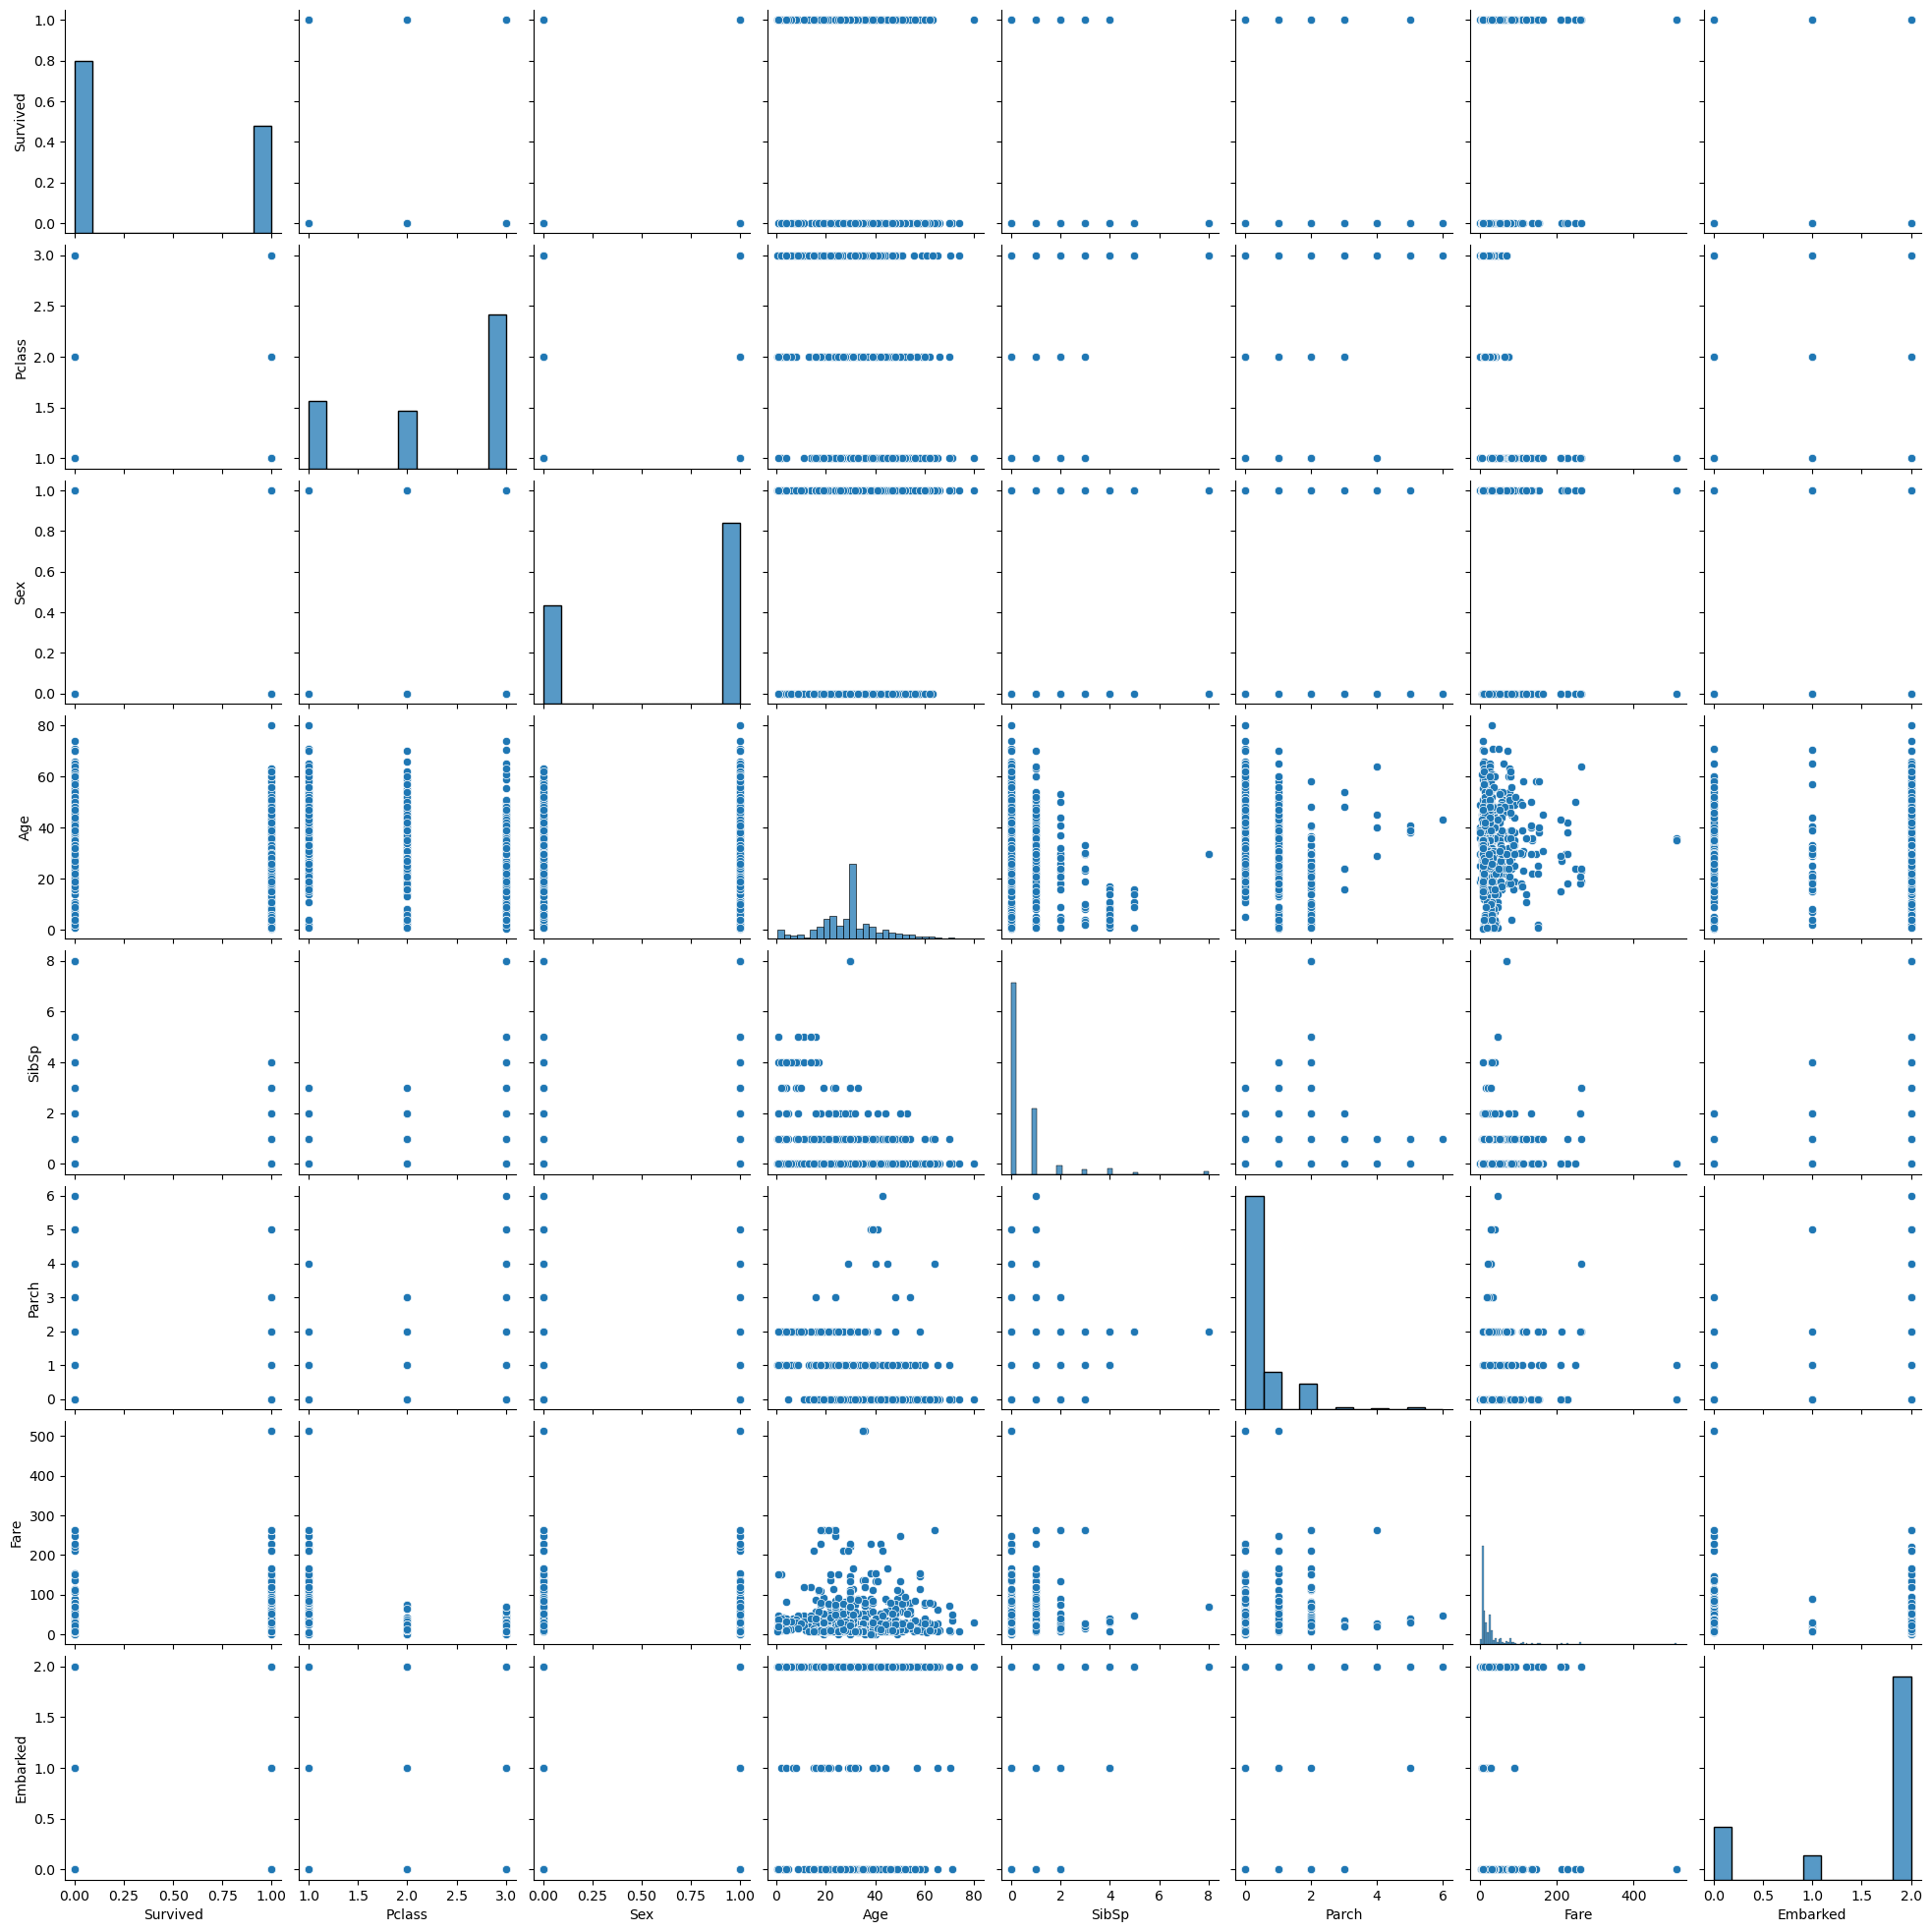

---------------------------------------------------------------------


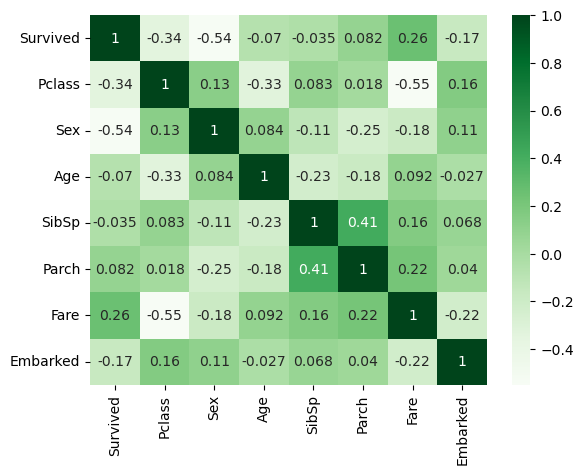

---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0 

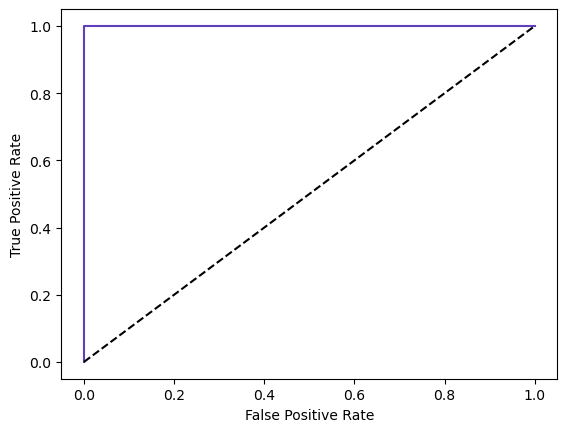

---------------------------------------------------------------------
AUC (TEST DATA) =  0.7816604352411083
---------------------------------------------------------------------


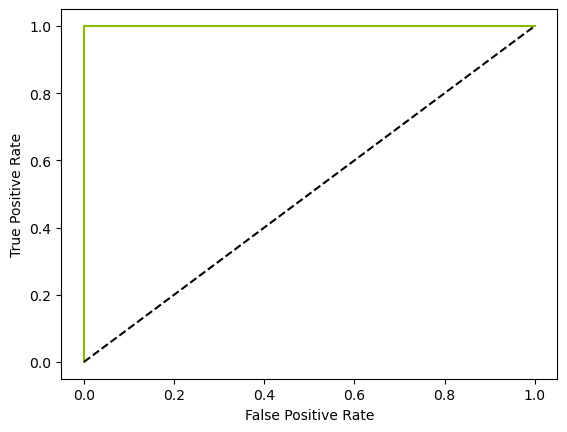

---------------------------------------------------------------------
Coefficents =  [[-1.04883131e+00 -2.63145314e+00 -3.84935941e-02 -3.17670503e-01
  -9.01413697e-02  2.13983605e-03 -2.19556707e-01]]
---------------------------------------------------------------------
odds_ratio =  [[0.35034696 0.0719738  0.96223787 0.72784257 0.91380199 1.00214213
  0.80287463]]
---------------------------------------------------------------------


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#importing Training Data
train_data=pd.read_csv('Titanic_train.csv')
train_data.head(3)
train_data.info()
print('-'*69)
# train data Pre-processing
train_data['Ticket'].nunique()
train_data1=train_data.copy()
# deleting useless feature columns
train_data1.drop('PassengerId',axis=1,inplace=True)
train_data1.drop('Name',axis=1,inplace=True)
train_data1.drop('Cabin',axis=1,inplace=True)
train_data1.drop('Ticket',axis=1,inplace=True)
# filling null values
train_data1.describe()
train_data1.fillna({
    'Age':train_data1['Age'].mean(),
    'Embarked':train_data1['Embarked'].mode()[0]
},inplace=True)
train_data1.isnull().sum()
# Changing data Type
train_data1['Embarked']=train_data1['Embarked'].astype('category')
train_data1['Sex']=train_data1['Sex'].astype('category')
# converting Categorical data to numeric values
labelencoder=LabelEncoder()
train_data1['Sex']=labelencoder.fit_transform(train_data1['Sex'])
train_data1['Embarked']=labelencoder.fit_transform(train_data1['Embarked'])
train_data1.head()
# visualisation of cleaned data
sns.pairplot(train_data1)
plt.show()
print('-'*69)
# Finding co_relation
cor=train_data1.corr()
sns.heatmap(cor,annot=True,cmap='Greens')
plt.show()
print('-'*69)
# spliting Features & Labels
X_train=train_data1.iloc[:,1:]
y_train=train_data1.iloc[:,0]
# Building Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
# Predecting y values from X train
yhat_train=model.predict(X_train)
# Using metrics for knowing its performance and validating it
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
c_matrix=confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))
# Importing testing data
test_data=pd.read_csv('Titanic_test.csv')
print(test_data.head()) # NO Y training data is specified in dataSet
print('-'*69)
test_data1=test_data.copy()
# Droping unwanted Features
test_data1.drop('PassengerId',axis=1,inplace=True)
test_data1.drop('Name',axis=1,inplace=True)
test_data1.drop('Cabin',axis=1,inplace=True)
test_data1.drop('Ticket',axis=1,inplace=True)
test_data1.isnull().sum()
# Removing nulls
test_data1.describe()
test_data1.fillna({
    'Age':test_data1['Age'].mean(),
    'Fare':test_data1['Fare'].mean()
},inplace=True)
# Changing data Type
test_data1['Embarked']=test_data1['Embarked'].astype('category')
test_data1['Sex']=test_data1['Sex'].astype('category')
# Converting categorical data to numeric values
test_data1['Sex']=labelencoder.fit_transform(test_data1['Sex'])
test_data1['Embarked']=labelencoder.fit_transform(test_data1['Embarked'])
test_data1.head()
# Directly predecting Y values from X test
X_test=test_data1
y_test=model.predict(X_test)
# Evaluating the outcome by ROC CURVE for train data
fpr, tpr, thresholds = roc_curve(yhat_train, model.predict_proba (X_train)[:,1])
plt.plot(fpr, tpr,color='#5E40BE')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('-'*69)
auc = roc_auc_score(y_train,yhat_train)
print('AUC (TEST DATA) = ',auc)
print('-'*69)
# Evaluating the outcome by ROC CURVE for train data
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])
plt.plot(fpr, tpr,color='#88BB00')
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('-'*69)
# Evaluating model
import numpy as np
coeff=model.coef_
incep=model.intercept_
print('Coefficents = ',coeff)
print('-'*69)
odds_ratio=np.exp(coeff)
print('odds_ratio = ',odds_ratio)
print('-'*69)
# Converting DataFrame into binary data(serialize)
from pickle import dump
dump(model,open('Logreg.pkl','wb'))

#### Interview Questions
    1.
    1.Precision is defined as how many are predicted positive cases are actually positive.
    2.Pr=(TP)/(TP+FP).
    3.Recall is measure of how many actual positivie cases are correctly predicted.
    4.Recall is also called as sensivity.Re=(TP)/(TP+TN).
    5.Major difference between them is Precision completely focus on how correctly it predict positive case.While Recall is
     focuse on completeness of positive predicted cases.
    6.High Precision means fewer false positives and.High Recall means fewer false negatives
    
    2.
        Cross-validation is a technique to evaluate a model's performance by splitting data into multiple training and testing sets.The most common method is k-fold cross-validation, where the dataset is divided into 𝑘 subsets, and the model is trained 𝑘 times, each time using a different subset as the test set.It helps in assessing how well the model generalizes to unseen data, reducing the risk of overfitting.Stratified k-fold cross-validation ensures class balance in each fold, which is crucial for binary classification with imbalanced datasets.It provides a more robust performance estimate compared to a single train-test split.Cross-validation helps in hyperparameter tuning, ensuring the best model selection 